In [410]:
import MySQLdb
import re
import jieba.analyse
import time
tStart = time.time()#計時開始

#連教室資料庫
# host = "140.115.236.205"
# host = "10.120.30.5"
#連本機資料庫
host = "127.0.0.1"

user = "zb101"
db = "ptt"
passwd = "zb101"
cursor = None

try :

    # 連接到 MySQL
    db = MySQLdb.connect(host=host, user=user, passwd=passwd, db=db, charset='utf8')
    cursor = db.cursor()
    
    # 執行 SQL 語句    
    s1000=u"""
            SELECT title, context,art_id
            FROM article 
            WHERE art_id IN (SELECT art_id FROM push_top1000_in_a_month);
            """
            
    cursor.execute(s1000)
   
    allPtt = cursor.fetchall()
#     print cursor
#     print allPtt

except MySQLdb.Error as sqlErr :
    print sqlErr
finally: 
    if cursor :
        cursor.close()
    if db :
        db.close()
#print '\r'.join(allTitle),

In [456]:
# 輸出結果
allTitle = []
allText = []
allArtid = []
title = None
context = None
art_id = None
for title,context,art_id  in allPtt:
    #print "before" + text
    text_new=re.sub(u'(\[\S{2,}\])|(\［\S{2,}\］)| |',u'',context)
    allText.append(text_new)
    allTitle.append(title)
    allArtid.append(art_id)
#     |(Fw:\s*)|(Re:\s*)
#     print title
#     print text_new
jieba.set_dictionary('C:\Python27\Lib\site-packages\jieba\dict.txt.big')
jieba.load_userdict('C:\Python27\Lib\site-packages\jieba\dict20150803.txt')
ary = allText
corpus = []
jieba.analyse.set_stop_words('D:\Python_workspace\MySQL\stopword20150803.txt')
for text in ary:
#     print '===================================='
#     print ' '.join(jieba.cut(text))
    corpus.append(' '.join(jieba.analyse.extract_tags(text,topK=5)))
# print type(allTitle)
# print corpus
from sklearn.feature_extraction.text import CountVectorizer
# import codecs
ls = None
with codecs.open('D:\Python_workspace\MySQL\stopwd.txt','r','utf-8') as f :
    ls = [re.sub(u'[\r\n]',u'',x) for x in f.readlines()]
# print ls
vectorizer = CountVectorizer(stop_words=ls)
# vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()
stopword = vectorizer.get_stop_words()
# print 'stopwd=',stopword
for w in word:
    print w

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()
# print weight
# print type(tfidf)

Building prefix dict from C:\Python27\Lib\site-packages\jieba\dict.txt.big ...
DEBUG:jieba:Building prefix dict from C:\Python27\Lib\site-packages\jieba\dict.txt.big ...
Loading model from cache c:\users\kmf0822\appdata\local\temp\jieba.u8bf3ebe1cc91d51ad2f7c79bb72f08c0.cache
DEBUG:jieba:Loading model from cache c:\users\kmf0822\appdata\local\temp\jieba.u8bf3ebe1cc91d51ad2f7c79bb72f08c0.cache
Loading model cost 1.08299994469 seconds.
DEBUG:jieba:Loading model cost 1.08299994469 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


01
0111
0113
0121
02
03
0315
0320
05
0515
06
07
08
0810
09
101
108
110
112
1129
120
1200
136
14
150
1517
1520
1721
1723
1900
1949
1dficrv
200
2008
2011
2012
2015
2017
2120
215cm
22
228
22k
23
2403
24h
26
28
3000
3013
31
31v6ffu
35b
38
39
3g
41
42
42689
43
46k
47
4k
500
51
53
54
55
5566
56
61k
623
633
64
689
71
831
88
95
990
a694
a7822
aa85720
adm123
alec0219
androidapp
andylin2468
av
ayaerika
ba
bar
bb
bc
beveragesman
bmi
care
cd
cgi0911
cheerup
chemtcwu
china
costco
cper
crizal
cxzdsa
dhl
djwljyy
dpp
dream8
e5
e6
e9
email
en
erika
ettoday
exceloreviews
exp
ey
f16
f35
facebo
fantasibear
fb
fratell
funnypeter
gallardo
gd
gdp
germany
gg
gi
gikber
glass
gnemail183
goo
google
goss
gost
gox
gta
guyfawkes
hani
hao123
hatepolitics
heading
hiddychen
hoo
htc
https
ikea
ikea04
info
intel
ip
iyusungu
j10a
jaja
jim663
junior
k90209
k99t
kana
kangsuat
kevin901227
kevinlove
kimgordon
kkc
kmt
ktr
l5219
lalazizi
landtoss
lemon
longstay
lovelive
ly
m8sx
madaniel
mail
makar
meuoay
mitsukuni
momo
mt
myfo

In [350]:
print tfidf
print tfidf.toarray()
print weight
print sparse.csr_matrix(weight)

  (0, 231)	0.498997954813
  (0, 1719)	0.456184796011
  (0, 859)	0.521006944762
  (0, 2097)	0.521006944762
  (1, 879)	0.450387095572
  (1, 713)	0.462096377442
  (1, 1370)	0.404503802642
  (1, 356)	0.363696398815
  (1, 1292)	0.536395381443
  (2, 1197)	0.531803620257
  (2, 676)	0.627315544455
  (2, 1196)	0.349227061842
  (2, 1036)	0.40104108666
  (2, 1972)	0.202154948627
  (3, 2003)	0.4472135955
  (3, 2231)	0.4472135955
  (3, 352)	0.4472135955
  (3, 1767)	0.4472135955
  (3, 112)	0.4472135955
  (4, 1886)	0.480010533421
  (4, 613)	0.480010533421
  (4, 2185)	0.431154294607
  (4, 753)	0.42028903736
  (4, 2159)	0.42028903736
  (5, 1907)	0.437542607415
  :	:
  (995, 1157)	0.465774539319
  (995, 303)	0.465774539319
  (995, 1351)	0.465774539319
  (995, 1788)	0.439601369374
  (995, 1353)	0.394858039822
  (996, 1107)	0.63380950299
  (996, 1536)	0.467053200867
  (996, 1036)	0.429317185945
  (996, 1972)	0.216408234858
  (996, 356)	0.386006542974
  (997, 2261)	0.568505904925
  (997, 980)	0.51389397381

In [351]:
print weight
print 
print tfidf

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

  (0, 231)	0.498997954813
  (0, 1719)	0.456184796011
  (0, 859)	0.521006944762
  (0, 2097)	0.521006944762
  (1, 879)	0.450387095572
  (1, 713)	0.462096377442
  (1, 1370)	0.404503802642
  (1, 356)	0.363696398815
  (1, 1292)	0.536395381443
  (2, 1197)	0.531803620257
  (2, 676)	0.627315544455
  (2, 1196)	0.349227061842
  (2, 1036)	0.40104108666
  (2, 1972)	0.202154948627
  (3, 2003)	0.4472135955
  (3, 2231)	0.4472135955
  (3, 352)	0.4472135955
  (3, 1767)	0.4472135955
  (3, 112)	0.4472135955
  (4, 1886)	0.480010533421
  (4, 613)	0.480010533421
  (4, 2185)	0.431154294607
  (4, 753)	0.42028903736
  (4, 2159)	0.42028903736
  (5, 1907)	0.437542607415
  :	:
  (995, 1157)	0.465774539319
  (995, 303)	0.465774539319
  (995, 1351)	0.465774539319
  (995, 1788)	0.439601369374
  (995, 1353)	0.3948580398

In [457]:
from sklearn import cluster
from sklearn.metrics.pairwise import linear_kernel
cp_cosine_similarities = linear_kernel(tfidf, tfidf)
print cp_cosine_similarities
print cp_cosine_similarities.shape
# import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cp_cosine_similarities)
print pca_data
print pca_data.shape
print weight.shape
print tfidf.shape

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
(1000, 1000)
[[ 0.30028962 -0.07191832]
 [ 0.32158008 -0.05376932]
 [ 0.13392537 -0.08240466]
 ..., 
 [ 0.21456281  0.07338562]
 [ 0.08110057  0.38091854]
 [ 0.27313502 -0.09335067]]
(1000, 2)
(1000, 2349)
(1000, 2349)


In [463]:
param = [{'model':cluster.DBSCAN(eps=1.15,min_samples=7),
          'title':'dbscan'}]
c = param[0]['model']
print c
k_data = c.fit_predict(tfidf)
print k_data

# print weight.shape
labels = c.fit(tfidf).labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

DBSCAN(algorithm='auto', eps=1.15, leaf_size=30, metric='euclidean',
    min_samples=7, p=None, random_state=None)
[-1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  2  4 -1  0
 -1 -1 -1 -1  0 -1  7 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1
 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  5
 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0
  5 -1 -1 -1 -1 -1 -1  0 -1  0  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  4  1 -1 -1 -1 -1 -1  3 -1
 -1 -1  1 -1 -1  6  4 -1 -1 -1  6  4 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1  6  1 -1 -1 -1  1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8  2  0 -1 -1 -1  7  1  3  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1  7 -1  0 -1 -1 -1 -1 -1 -1  8 -1
 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 

In [459]:
target = 0 #設定目標標題     #index順序同SQL

from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[target], tfidf).flatten()
# print cosine_similarities

related_docs_indices = cosine_similarities.argsort()[:-11:-1]
# print related_docs_indices
for index in related_docs_indices:
#     pass
#     print '========================'
    print 'index =',index,',','art_id =',allArtid[index]
    print allTitle[index]#,allTitle[9]
    print corpus[index]#,'==============',corpus[9]

index = 0 , art_id = 153012
[新聞] 林冠華燒炭死諫 海倫清桃「死沒有用」
海倫清桃 林冠華 燒炭 自殺 遺忘
index = 664 , art_id = 150631
Re: [新聞] 林冠華燒炭死諫 海倫清桃「死沒有用」
記得 林冠華 海倫清桃 燒炭 自殺
index = 432 , art_id = 150633
Re: [新聞] 林冠華燒炭死諫 海倫清桃「死沒有用」
記得 自殺 林冠華 海倫清桃 國父
index = 40 , art_id = 153267
[新聞] 鄭捷案後發起「免費擁抱」 那名暖男就是
林冠華 鄭捷 擁抱 免費 自殺
index = 80 , art_id = 150635
Re: [新聞] 林冠華燒炭死諫 海倫清桃「死沒有用」
自殺 林冠華 放棄 信念 生命
index = 886 , art_id = 150629
Re: [新聞] 林冠華燒炭死諫 海倫清桃「死沒有用」
sak ip 海倫清桃 ey 53
index = 132 , art_id = 153475
[ＦＢ] 管仁健：家屬將是國民黨的最後一根稻草
民進黨 詹益 國民黨 課綱 自殺
index = 284 , art_id = 153021
[新聞] 林冠華：我們需要知的權力 母親望文落淚
林冠華 兒子 歷史 news 母親
index = 437 , art_id = 150676
Re: [新聞] 母盼冠華原諒：有病的是被洗腦的家長
林冠華 冠華 洗腦 課綱 14
index = 559 , art_id = 150677
Re: [新聞] 母盼冠華原諒：有病的是被洗腦的家長
自殺 課綱 衛兵 懲罰 2015


In [355]:
labels = c.fit(tfidf).labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

4


In [341]:
from sklearn import metrics
print metrics.homogeneity_score(,labels)

SyntaxError: invalid syntax (<ipython-input-341-a37fe81fb6ae>, line 2)

In [342]:
from scipy import sparse
print sparse.csr_matrix(weight)

  (0, 388)	0.331286673696
  (0, 1321)	0.545463164918
  (0, 1464)	0.40396445874
  (0, 1966)	0.493064770232
  (0, 2078)	0.431762578253
  (1, 355)	0.4472135955
  (1, 1181)	0.4472135955
  (1, 1325)	0.4472135955
  (1, 1363)	0.4472135955
  (1, 1374)	0.4472135955
  (2, 814)	0.43326446326
  (2, 985)	0.388975276702
  (2, 1369)	0.43326446326
  (2, 1547)	0.586575146257
  (2, 2248)	0.359432388164
  (3, 275)	0.473828781563
  (3, 604)	0.444373480063
  (3, 1099)	0.407264188878
  (3, 2266)	0.473828781563
  (3, 2285)	0.43317509416
  (4, 49)	0.50557253164
  (4, 1422)	0.307059125329
  (4, 1493)	0.50557253164
  (4, 2146)	0.408439706697
  (4, 2577)	0.47716300155
  :	:
  (995, 971)	0.462305877469
  (995, 1072)	0.489830837901
  (995, 1164)	0.489830837901
  (995, 1445)	0.489830837901
  (995, 1516)	0.257818785937
  (996, 877)	0.469818970704
  (996, 1407)	0.356001835148
  (996, 1934)	0.425980355861
  (996, 2078)	0.425980355861
  (996, 2637)	0.538158249011
  (997, 754)	0.466320956159
  (997, 1045)	0.466320956159

In [198]:
print k_data.shape
print c.get_params

(1000,)
<bound method DBSCAN.get_params of DBSCAN(algorithm='auto', eps=1.335, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)>


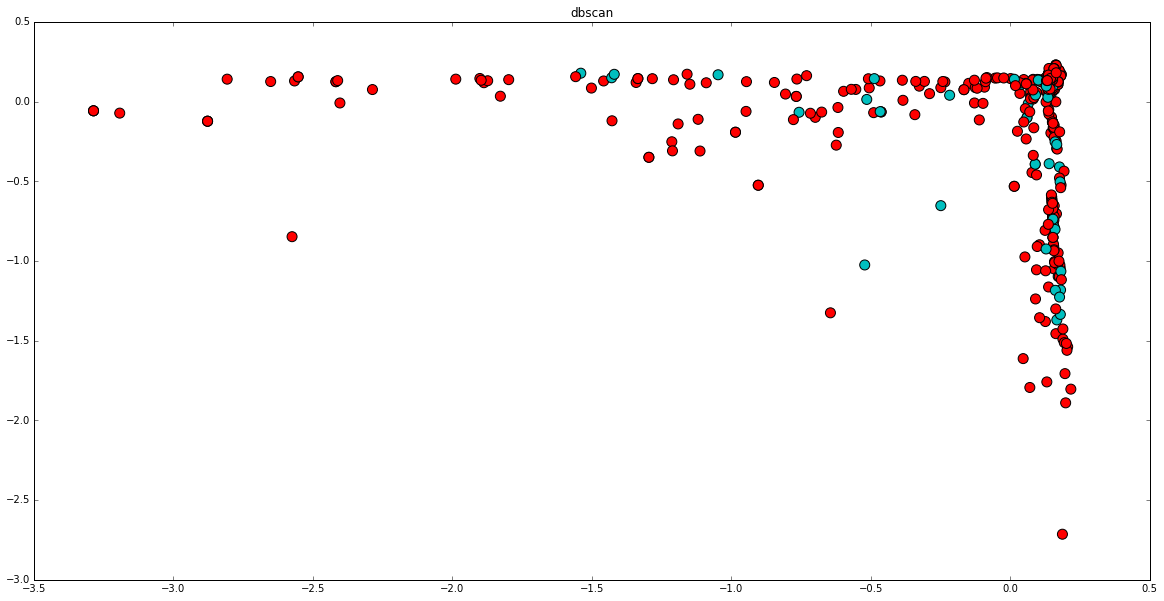

In [257]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(20,10))
# colors = np.random.random((12,3))
axes.scatter(pca_data[:,0], pca_data[:,1],c=['rgbyc'[i] for i in k_data ], s=100, alpha=1)
axes.set_title(param[0]['title'])

In [306]:
print k_data

[-1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  4  1 -1 -1 -1  4 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1  3 -1  0
 -1 -1 -1  3 -1 -1  3 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1  1

In [307]:
for i in k_data:
    print np.random.rand(9,3)[i]

[ 0.80498516  0.0925148   0.26963122]
[ 0.17596649  0.67041942  0.19156843]
[ 0.64339845  0.50861373  0.25935116]
[ 0.95316624  0.19083588  0.58572507]
[ 0.43786039  0.62445085  0.45084756]
[ 0.72732998  0.6049407   0.70028658]
[ 0.92284992  0.17827526  0.04453757]
[ 0.7950053   0.16493883  0.16213666]
[ 0.69207438  0.78255184  0.30317674]
[ 0.29516961  0.54779904  0.23483697]
[ 0.68864583  0.06167462  0.90012156]
[ 0.59153493  0.99260748  0.64718774]
[ 0.75536255  0.02032752  0.67872928]
[ 0.12932943  0.69118416  0.27178639]
[ 0.26427785  0.89245128  0.11155736]
[ 0.43614363  0.43529419  0.51733455]
[ 0.62576366  0.53273605  0.59325178]
[ 0.27112874  0.44935732  0.01217451]
[ 0.29138185  0.86964518  0.54558023]
[ 0.04183756  0.61435911  0.18775245]
[ 0.88539189  0.50271223  0.74704879]
[ 0.39133793  0.71198704  0.3469104 ]
[ 0.29444107  0.60268619  0.04444316]
[ 0.28211653  0.57613063  0.81752904]
[ 0.03486756  0.29267502  0.62164814]
[ 0.6651934   0.18025038  0.58996596]
[ 0.25745571